In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }
df=pd.DataFrame(data=Stock_Market)
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


In [3]:
df.columns

Index(['Year', 'Month', 'Interest_Rate', 'Unemployment_Rate',
       'Stock_Index_Price'],
      dtype='object')

In [4]:
df.shape

(24, 5)

In [15]:
df.isnull().sum()

Year                 0
Month                0
Interest_Rate        0
Unemployment_Rate    0
Stock_Index_Price    0
dtype: int64

There is no Missing values, So the 'feature engineering technique' is not necessary

## Comparing Interest Rate (vs) Stock Index Price

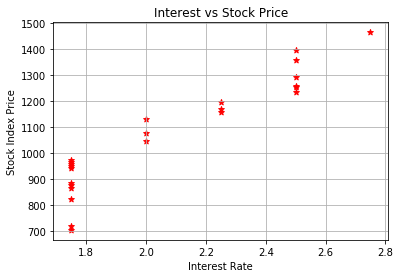

In [18]:
## Before going to linear_model We have to check is any relationships exist among the dependent/independent variable
plt.scatter(df['Interest_Rate'],df['Stock_Index_Price'],color='red',marker="*")

plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')
plt.title('Interest vs Stock Price')

plt.grid()
plt.show()

From here, it is clear that there exists some linear relationships between the data-set

As the interest rate(Independent rate) increases the Stock Index Price(Dependent rate) also increases

## Comparing Unemployment Rate (vs) Stock Index Price

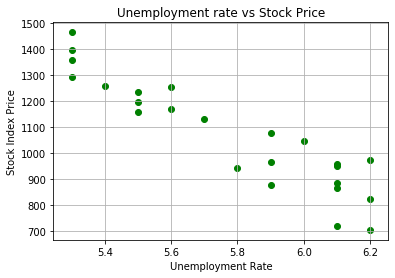

In [21]:
## Before going to linear_model We have to check is any relationships exist among the dependent/independent variable
plt.scatter(df['Unemployment_Rate'],df['Stock_Index_Price'],color='green',marker="o")

plt.xlabel('Unemployment Rate')
plt.ylabel('Stock Index Price')
plt.title('Unemployment rate vs Stock Price')

plt.grid()
plt.show()

As the 'Unemployment Rate' increases the 'Stock Index Price' decreases, so the linear relationship exists between the data-set

In [28]:
x = df[['Interest_Rate','Unemployment_Rate']].values
y = df[['Stock_Index_Price']].values

## With sklearn model

In [32]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing the model

In [36]:
np.round(lr.predict(x_test))

array([[ 887.],
       [1427.],
       [ 887.],
       [1296.],
       [ 947.]])

In [35]:
y_test

array([[ 822],
       [1464],
       [ 704],
       [1234],
       [ 943]], dtype=int64)

In [43]:
print("Overall Prediction  : ",lr.score(x,y))
print('Training Prediction : ',lr.score(x_train,y_train))
print('Testing Prediction  : ',lr.score(x_test,y_test))

Overall Prediction  :  0.8886489711727623
Training Prediction :  0.8872075102895034
Testing Prediction  :  0.888534855362892


In [44]:
print('Intercept : ',lr.intercept_)

Intercept :  [1101.48691825]


In [46]:
print('Coefficient : ',lr.coef_)

Coefficient :  [[ 405.37745538 -148.94449425]]


## With Stats model

In [49]:
import statsmodels.api as sm

In [67]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()

In [68]:
model = model.summary()
print(model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     62.93
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.62e-08
Time:                        11:44:24   Log-Likelihood:                -105.05
No. Observations:                  19   AIC:                             216.1
Df Residuals:                      16   BIC:                             218.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1101.4869   1101.469      1.000      0.3

In [69]:
## See under coefficient, 1st is the constant and 2nd,3rd are coefficients